In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv, matplotlib
from scipy.optimize import curve_fit
from scipy.stats import linregress
from pulse_analysis import read_dat
from scipy.signal import find_peaks
import uncertainties as un
import matplotlib.patches as pat
from matplotlib import colors
import time
%matplotlib widget
matplotlib.rcParams.update({
    'figure.figsize': (13,9),
    'font.size': 18
})

names = ['']


dat_file = read_dat(f'PTB_SP120_250.dat')


init complete


In [2]:

write_file = open('PTB_SP120_250_out.csv', 'w')
baseline_samples = 200
start = -30
short = 75
long = 1000

cfd_frac = 0.75
cfd_offset = 6

t0 = time.time()
csv_writer = csv.writer(write_file)
csv_writer.writerow(['L ch_0', 'S ch_0', 'L ch_1', 'S ch_1', 'L geo_mean', 'S geo_mean', 'tof geo_mean'])

counter = 0


for i in range(10000):
    read_traces = dat_file.read_event(baseline_samples)

    cfd_0 = dat_file.cfd(read_traces[0], cfd_frac, cfd_offset)[1]
    cfd_1 = dat_file.cfd(read_traces[1], cfd_frac, cfd_offset)[1]

    integrals_0 = dat_file.calculate_integrals(read_traces[0], cfd_0, start, short, long)
    integrals_1 = dat_file.calculate_integrals(read_traces[1], cfd_1, start, short, long)

    geo_mean_trace = dat_file.get_geometric_mean_trace(read_traces[:2], [cfd_0, cfd_1])
    geo_mean_cfd = dat_file.cfd(geo_mean_trace, cfd_frac, cfd_offset)[1]
    geo_mean_integrals = dat_file.calculate_integrals(geo_mean_trace, geo_mean_cfd, start, short, long)

    geo_mean_tof = dat_file.time_of_flight(geo_mean_trace, read_traces[2], 350, 5000, (cfd_frac, cfd_offset))

    csv_writer.writerow([integrals_0[1], integrals_0[0]/integrals_0[1], integrals_1[1], integrals_1[0]/integrals_1[1], geo_mean_integrals[1], geo_mean_integrals[0]/geo_mean_integrals[1], geo_mean_tof])

    counter += 1

    if counter % 1000 == 0:
        print(f'{counter} events read')

print('Finished...')

write_file.close()

t1 = time.time()




    



1000 events read
2000 events read
3000 events read
4000 events read
5000 events read
6000 events read
7000 events read
8000 events read
9000 events read
10000 events read
Finished...


In [3]:
print(f'Time taken: {t1-t0}')

Time taken: 17.33927273750305


In [2]:
traces, traces_raw = dat_file.read_event(100)

In [3]:
align_points_0 = dat_file.cfd(traces[0], 0.75, 6)
align_points_1 = dat_file.cfd(traces[1], 0.75, 6)

In [4]:
geo_trace = dat_file.get_geometric_mean_trace(traces[:2], [align_points_0[1], align_points_1[1]])

In [12]:
polygon_file = open('PTB_SP120_250_cuts.csv', 'r')
polygon_csv_reader = csv.reader(polygon_file)
next(polygon_csv_reader)

polygons_x = []
polygons_y = []

i = 0
for row in polygon_csv_reader:
    if i % 2 == 0:
        polygons_x.append([float(x) for x in row])
    elif i % 2 == 1:
        polygons_y.append([float(x) for x in row])

    i += 1

polygons = []

for c in range(len(polygons_x)):
    polygons.append(pat.Polygon(np.transpose([polygons_x[c], polygons_y[c]])))



In [14]:
print(polygons[0].)

Polygon16((814578, 0.272367) ...)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


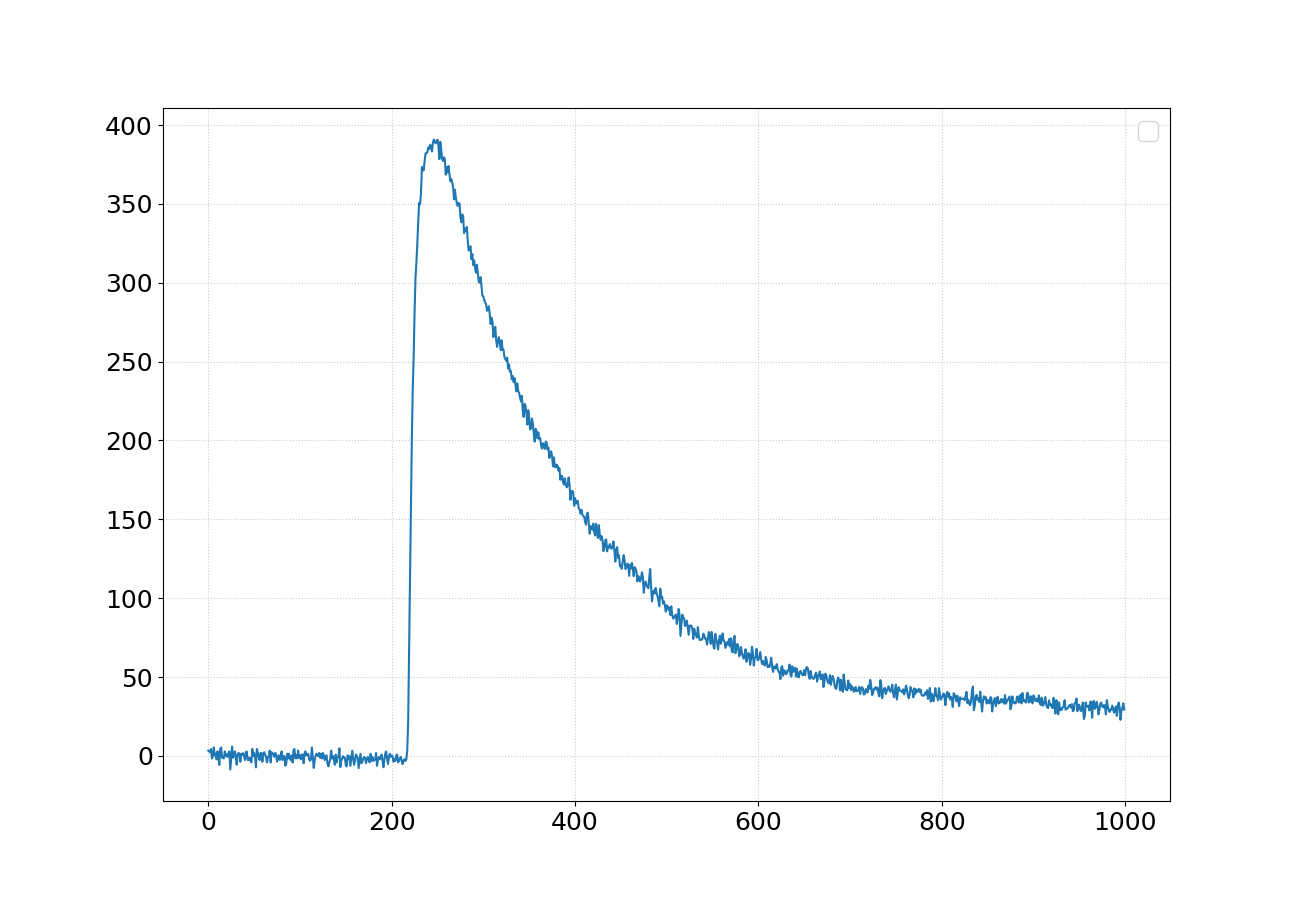

In [5]:
plt.figure()

plt.plot(geo_trace)

plt.xlabel('')
plt.ylabel('')
# plt.yscale('log')

plt.title('')
plt.legend()
plt.grid(color='#CCCCCC', linestyle=':')
#plt.savefig()
plt.show()